This is the first in a series of posts in which I'll be exploring machine learning concepts. The series is loosely based on the sequence from Andrew Ng's [Introduction to Machine Learning](https://www.coursera.org/learn/machine-learning) course on Coursera, but won't cover every part of the coursework, and may veer into interesting tangents along the way. 

In each post that I cover a major machine learning algorithm, I'll first implement it from scratch, using standard Python data science tools like numpy, scikit-learn and others. Then, I'll build it in [Tensorflow](https://www.tensorflow.org/), a powerful new machine learning library from Google. 

The first algorithm is [linear regression](https://en.wikipedia.org/wiki/Linear_regression). Linear regression attempts to fit a line of best fit to a data set, using one or more features as coefficients for a linear equation. This algorithm is the most basic in machine learning and should look familiar to anyone who has been exposed to even a little bit of statistics. 

# Generating and Plotting Data 

I'm using the [`make_regression`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function from [scikit-learn](http://scikit-learn.org/stable/index.html) to generate a simple data set that will illustrate this algorithm well. This function takes a number of parameters to tune its output, but here the important ones are the number of samples (100), the number of features (1, allowing a 2D plot of the data and regression), and noise, which adds a little random variation so the points don't lie *exactly* on a line.

In [1]:
from sklearn.datasets import make_regression
import numpy as np

X, y = make_regression(n_samples=100, n_features=1, noise=15.0)

print('X:', X.shape)
print('y:', y.shape)

X: (100, 1)
y: (100,)


The function returns two outputs, each a one-dimensional array. The first, XX, is a 100 row, 1 column matrix, representing 100 samples with 1 feature each. The second, yy, is a 100 element vector holding the output values for each sample.

Below I plot the data, after defining a simple plotting function to reuse.

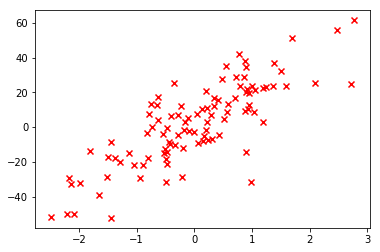

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(X, y):
    plt.scatter(X, y, marker='x', color='red')

plot(X, y)

# Simple Linear Regression

We'll start by implementing the hypothesis and cost functions for linear regression.  The hypothesis function $h_\theta(x)$ is the [linear combination](https://en.wikipedia.org/wiki/Linear_combination) of feature vector $x$ and parameter vector $\theta$, and is used to predict an output value $y$.  Note that it is equivalent to the equation for a line as commonly taught in algebra, $y = mx + b$.

$$
h_\theta(\textbf{x}) = \boldsymbol{\theta}_0 + \boldsymbol{\theta}_1\textbf{x}_1
$$

Below, the implementation for $h_\theta(x)$ is *vectorized*, meaning it works with all input examples, instead of a single example $\textbf{x}$.

In [3]:
import numpy as np

def predict(X, theta):
    return np.matmul(X, theta)

The [cost function](https://en.wikipedia.org/wiki/Loss_function) used here is [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error), or MSE.  This function $J(\theta)$ represents the mean of the total difference between the actual $y$ values for all examples and what $h_\theta(x)$ predicted they would be given parameters $\theta$.  Squaring the difference ensures all differences are positive, and penalizes large errors proportionally more than small ones.

$$
J(\theta) = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(\textbf{X}_{i}) - \textbf{y}_i)^2
$$

In [4]:
def cost(X, y, theta):
    return np.sum(np.square(predict(X, theta) - y)) / (2 * len(y))

Before computing the cost with an initial guess for $\theta$, a column of 1s is prepended onto the input data.  This allows us to vectorize the cost function, as well as make it usable for multiple linear regression later.  This first value $\theta_0$ now behaves as a constant in the cost function.

In [5]:
theta = np.zeros(2)
X = np.column_stack((np.ones(len(X)), X))
#y = rentals
#cost = cost(X, y, theta)

print('theta:', theta)
print('cost:', cost(X, y, theta))

theta: [ 0.  0.]
cost: 274.614970831


We'll now minimize the cost using the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm.  Intuitively, gradient descent takes small, linear hops down the slope of a function in each feature dimension, with the size of each hop determined by the partial derivative of the cost function with respect to that feature and a learning rate multiplier $\alpha$.  If tuned properly, the algorithm converges on a global minimum by iteratively adjusting feature weights $\theta$ of the cost function, as shown here for two feature dimensions:

\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{\partial}{\partial\theta_0} J(\theta_0,\theta_1) \\
\theta_1 & := \theta_1 - \alpha\frac{\partial}{\partial\theta_1} J(\theta_0,\theta_1) 
\end{align}

The update rule each iteration then becomes:

\begin{align}
\theta_0 & := \theta_0 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \\
\theta_1 & := \theta_1 - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_1^{(i)} \\
\end{align}

See [here](http://mccormickml.com/2014/03/04/gradient-descent-derivation/) for a more detailed explanation of how the update equations are derived.

In [6]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

iterations = 5000
alpha = 0.1

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

NameError: name 'compute_cost' is not defined

We can examine the values of $\theta$ chosen by the algorithm using a few different visualizations, first by plotting $h_\theta(x)$ against the input data.  The results show the expected correlation between temperature and rentals.

In [ ]:
plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')
samples = np.linspace(min(temps), max(temps))
plt.plot(samples, theta[0] + theta[1] * samples)

A surface plot is a better illustration of how gradient descent approaches a global minimum, plotting the values for $\theta$ against their associated cost.  This requires a bit more code than an implementation in Octave / MATLAB, largely due to how the input data is generated and fed to the surface plot function.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Xs, Ys = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-40, 40, 50))
Zs = np.array([compute_cost(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

Finally, a countour plot reveals slices of that surface plot in 2D space, and can show the resulting $\theta$ values sitting exactly at the global minimum.

In [ ]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))

# Multiple Linear Regression

First, we reload the data and add two more features, humidity and windspeed.

Before implementing gradient descent for multiple variables, we'll also apply [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to normalize feature values, preventing any one of them from disproportionately influencing the results, as well as helping gradient descent converge more quickly.  In this case, each feature value is adjusted by subtracting the mean and dividing the result by the standard deviation of all values for that feature:

$$
z = \frac{x - \mu}{\sigma}
$$

More details on feature scaling and normalization can be found [here](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html).

In [ ]:
def feature_normalize(X):
    n_features = X.shape[1]
    means = np.array([np.mean(X[:,i]) for i in range(n_features)])
    stddevs = np.array([np.std(X[:,i]) for i in range(n_features)])
    normalized = (X - means) / stddevs
    
    return normalized

X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
X = feature_normalize(X)
X = np.column_stack((np.ones(len(X)), X))

y = data['cnt'].values / 1000

The next step is to implement gradient descent for any number of features.  Fortunately, the update step generalizes easily, and can be vectorized to avoid iterating through $\theta_j$ values as might be suggested by the single variable implementation above:

$$
\theta_j := \theta_j - \alpha\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In [ ]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient

    return theta

theta = gradient_descent_multi(X, y, theta, alpha, iterations)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost', cost)

Unfortunately, it's now more difficult to evaluate the results visually, but we can check them a totally different method of calculating the answer, the [normal equation](http://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/).  This solves directly for the solution without iteration specifying an $\alpha$ value, although it begins to perform worse than gradient descent with large (10,000+) numbers of features.

$$
\theta = (X^TX)^{-1}X^Ty
$$

In [ ]:
from numpy.linalg import inv

def normal_eq(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_eq(X, y)
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

The $\theta$ values and costs for each implementation are identical, so we can have a high degree of confidence they are correct.

## Linear Regression in Tensorflow

Tensorflow offers significantly higher-level abstractions to work with, representing the algorithm as a computational graph.  It has a built-in gradient descent optimizer that can minimize the cost function without us having to define the gradient manually.

We'll begin by reloading the data and adapting it to more Tensorflow-friendly data structures and terminology.  Features are still normalized as before, but the added column of 1s is absent: the constant is treated separately as a *bias* variable, the previous $\theta$ values are now *weights*.

In [ ]:
import tensorflow as tf

X = data.as_matrix(columns=['atemp', 'hum', 'windspeed'])
X = feature_normalize(X)
y = data['cnt'].values / 1000
y = y.reshape((-1, 1))

m = X.shape[0]
n = X.shape[1]

examples = tf.placeholder(tf.float32, [m,n])
labels = tf.placeholder(tf.float32, [m,1])
weights = tf.Variable(tf.zeros([n,1], dtype=np.float32), name='weight')
bias = tf.Variable(tf.zeros([1], dtype=np.float32), name='bias')

The entire gradient descent occurs below in only three lines of code.  All that's needed is to define the hypothesis and cost functions, and then a gradient descent optimizer to find the minimum.

In [ ]:
hypothesis = tf.add(tf.matmul(examples, weights), bias)
cost = tf.reduce_sum(tf.square(hypothesis - y)) / (2 * m)
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

The graph is now ready to use, and all the remains is to start up a session, run the optimizer iteratively, and check the results.

In [ ]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(1, iterations):
        sess.run(optimizer, feed_dict={
            examples: X,
            labels: y
        }) 
        
    print('bias:', sess.run(bias))
    print('weights:', sess.run(weights))

The bias and weight values are identical to the $\theta$ values calculated in both implementations previously, so the Tensorflow implementation of the algorithm looks correct.

You can find the IPython notebook for this post on [GitHub](https://github.com/crsmithdev/notebooks/blob/master/ml-linear-regression/ml-linear-regression.ipynb).